# Keystroke Dynamics OT2

### Initial Setup.
Users data was collected using a logger while the user typed a set paragraph 10 times. The logger saves the key, the action (pressed or released), and the timestamp that it occurred.
Each users data is read from the txt file and is passed through a parser that calculates the time between pressing the first key in the bigram and releasing the second key in the bigram. 
The bigrams are then defined to calculate the data on, which we chose based on the most common bigrams used in english text. The statistics are then computed for each of the users as the baseline on which we later compare the test data to.


In [2]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

results = {}
users = ['oskar', 'johan', 'aoife', 'luke']

# compute statistics for user data
for user in users:
	user_results = get_pressed_data_diffs(bigrams, read_file(user))
	user_stats = get_stats(bigrams, user_results)
	results[user] = user_stats



### Print graphs by statistic for each user
Graphs are then produced to display each users values for the statistics 'Standard Deviation', 'Mean', and 'Variance' using the Python matplot library.

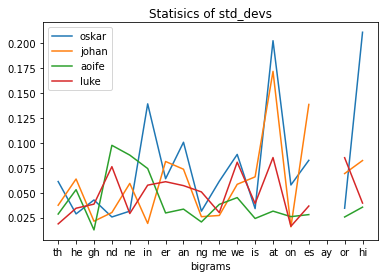

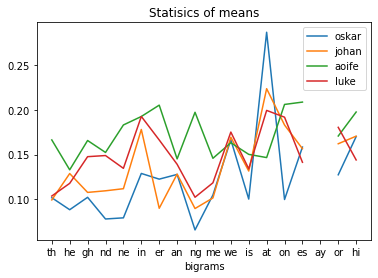

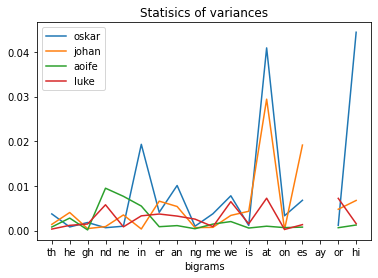

In [3]:
stat_keys = ['std_devs', 'means', 'variances']

for key in stat_keys:
	print_graph(results, key, bigrams, users)
	

### User Authentication
We then read in a test users data and calculated each of the statistics for this test user. Going through the test data we checked which bigrams were present in the test data and removed any extra bigrams from the other users' data. We then used the Mean Squared Error as a metric of comparison between the test data and each of the users. Finally we passed this information to a function that calculated the closest user by finding which user had the minimum sum MSE.

MINIMUM: 0.0006897371622208641


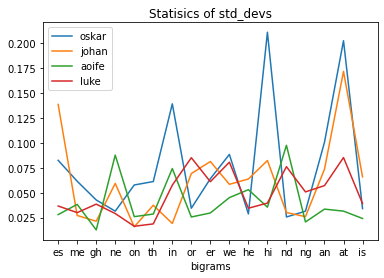

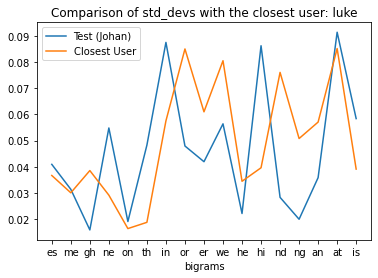

MINIMUM: 0.00035306240076634347


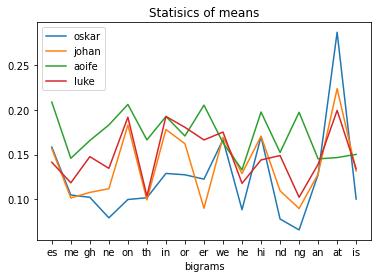

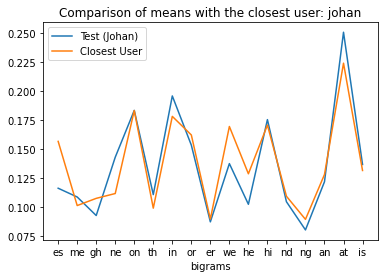

MINIMUM: 8.32215709371004e-06


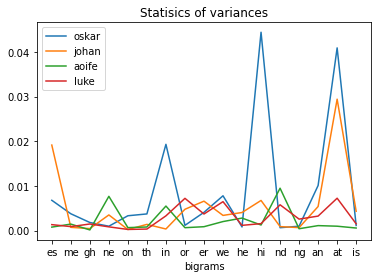

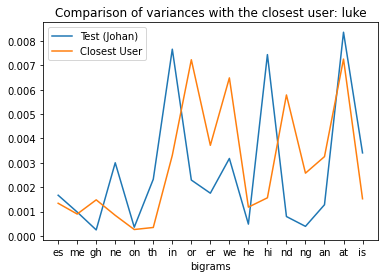

In [9]:
MSE = {}
closest_user = {'std_devs': '', 'means': '', 'variances': ''}

test_results = get_pressed_data_diffs(bigrams, read_file('testJohan'))
test_stats = get_stats(bigrams, test_results)
test_bigrams = test_stats['present_bigrams']

# get common bigrams for all users and test data
common_bigrams = list(set(bigrams) & set(test_bigrams))
for user in users:
	user_bigrams = results[user]['present_bigrams']
	common_bigrams = list(set(common_bigrams) & set(user_bigrams))

# compute mse for the different bigrams towards user data
for user in users:
	MSE[user] = {}
	for stat_key in stat_keys:
		user_stat_array = []
		test_stat_array = []
		for bigram in common_bigrams:
			user_stat_array.append(results[user][stat_key][bigram])
			test_stat_array.append(test_stats[stat_key][bigram])
		MSE[user][stat_key] = mse(user_stat_array, test_stat_array)


for stat_key in stat_keys:
	closest_user[stat_key] = find_closest_user(MSE, stat_key)
	print_graph(results, stat_key, common_bigrams, users)
	print_closest_user_graph(results, test_stats, closest_user[stat_key], stat_key, common_bigrams)



### Compare the statistics of Irish and Swedish students
In this data set, two Irish students and two Swedish students are represented. There are baseline differences here to be noted, such as the Irish students having english as their native language. Another difference is layout of keyboard which differs a little between the two groups. This next section aims to explore if there are any notable differences between the two in keystroke dynamics.

The data is combined for both the nationalities and then the statistics are computed. 

In [5]:
## compute the collective data for each nationality
irish_results = get_pressed_data_diffs(bigrams, (read_file('luke') + read_file('aoife')))
irish_stats = get_stats(bigrams, irish_results)

swedish_results = get_pressed_data_diffs(bigrams, (read_file('oskar') + read_file('johan')))
swedish_stats = get_stats(bigrams, swedish_results)

# get them into a better data structure
national_results = {
	'irish': irish_stats,
	'swedish': swedish_stats
}
		

Here the graphs are printed for both nationalities. It can be seen that there is a large difference between the two groups for all three of the statistics, particularly on certain bigrams such as 'at'.

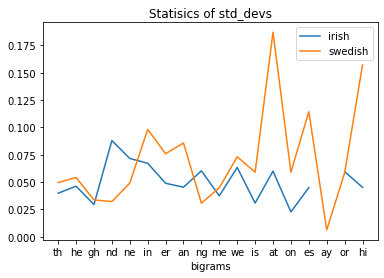

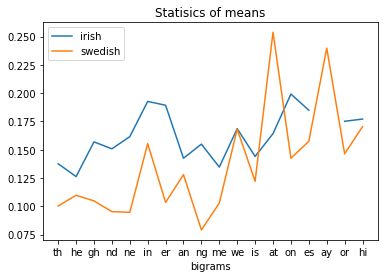

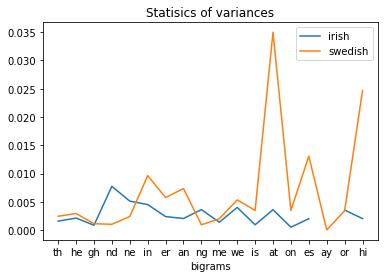

In [6]:
national_groups = ['irish', 'swedish']

for key in stat_keys:
	print_graph(national_results, key, bigrams, national_groups)

### Compare test data to national data 
Next we take the data we have computed for the different nationalities and compare it to the test data. Can we determine whether an Irish or Swedish has written this?

The statistics are calculated as before, and the MSE is calculated by comparing the test data to the combined 'national' data. When using test data written by Oskar (Swede), the program correctly identifies his nationality.

In [7]:
national_MSE = {}
closest_nationality = {'std_devs': '', 'means': '', 'variances': ''}

test_results = get_pressed_data_diffs(bigrams, read_file('test'))
test_stats = get_stats(bigrams, test_results)
test_bigrams = test_stats['present_bigrams']

# get common bigrams for nationalities and test data
common_national_bigrams = list(set(bigrams) & set(test_bigrams))
for group in national_groups:
	national_bigrams = national_results[group]['present_bigrams']
	common_national_bigrams = list(set(common_national_bigrams) & set(national_bigrams))

# compute national mse for the different bigrams towards nationality data
for group in national_groups:
	national_MSE[group] = {}
	for stat_key in stat_keys:
		national_stat_array = []
		test_stat_array = []
		for bigram in common_national_bigrams:
			national_stat_array.append(national_results[group][stat_key][bigram])
			test_stat_array.append(test_stats[stat_key][bigram])
		national_MSE[group][stat_key] = mse(user_stat_array, test_stat_array)


for stat_key in stat_keys:
	closest_nationality[stat_key] = find_closest_user(national_MSE, stat_key)
	print_graph(national_results, stat_key, common_national_bigrams, national_groups)
	print_closest_user_graph(national_results, test_stats, closest_nationality[stat_key], stat_key, common_national_bigrams)

ValueError: operands could not be broadcast together with shapes (17,) (14,) 